# PipSim: A Basic RISC-V Pipeline Simulator

## Table of Contents
1. [Introduction](#introduction)
2. [Architecture Overview](#architecture-overview)
3. [Components](#components) <br>
   3.1 [Instruction](#instruction) <br>
   3.2 [Pipeline](#pipeline) <br>
   3.3 [BranchPredictor](#branchpredictor) <br>
   3.4 [ForwardingUnit](#forwardingunit) <br>
4. [Pipeline Stages](#pipeline-stages)
5. [Hazard Handling](#hazard-handling)
6. [Memory and Register Simulation](#memory-and-register-simulation)
7. [Visualization](#visualization)
8. [Usage Guide](#usage-guide)
9. [Limitations and Future Work](#limitations-and-future-work)
---

## 1. Introduction <a name="introduction"></a>

PipSim is a RISC-V pipeline simulator designed to model and visualize the execution of RISC-V instructions through a 5-stage pipeline. This simulator is inspired by the comprehensive approach to computer architecture education advocated by Professor Onur Mutlu.

The primary goals of PipSim are:
- To provide a detailed simulation of a RISC-V pipeline
- To visualize the flow of instructions through pipeline stages
- To demonstrate key concepts such as hazard detection and handling
- To serve as an educational tool for understanding modern processor design

## 2. Architecture Overview <a name="architecture-overview"></a>

PipSim implements a 5-stage pipeline typical of RISC processors:
1. Instruction Fetch (IF)
2. Instruction Decode (ID)
3. Execute (EX)
4. Memory Access (MEM)
5. Write Back (WB)

The simulator models key components of a processor, including:
- Instruction parsing and classification
- Pipeline stage progression
- Data hazard detection and forwarding
- Basic branch prediction
- Register file and memory simulation

## 3. Components <a name="components"></a>

### 3.1 Instruction <a name="instruction"></a>

The `Instruction` class represents a single RISC-V instruction. It parses the raw instruction string and extracts relevant information such as opcode, source registers, destination register, and immediate values.

Key features:
- Instruction type classification (R-type, I-type, S-type, B-type, U-type, J-type)
- Parsing of instruction fields (op, rd, rs1, rs2, imm)
- Arithmetic operations: add, sub, addi
- Logical operations: and, or, xor, andi, ori, xori
- Shift operations: sll, srl, sra, slli, srli, srai
- Memory operations: lw, sw, lb, sb, lbu, sbu (_Upcoming!_)
- Control flow: beq, bne, blt, bge, bltu, bgeu, jal, jalr
- Upper immediate: lui, auipc

### 3.2 Pipeline <a name="pipeline"></a>

The `Pipeline` class is the core of the simulator. It manages the progression of instructions through the pipeline stages and handles hazard detection and resolution.

Key features:
- Simulation of all pipeline stages
- Stall management
- Hazard detection and handling
- Register file and memory simulation
- Cycle-by-cycle state tracking

### 3.3 BranchPredictor <a name="branchpredictor"></a>

The `BranchPredictor` class implements a simple branch prediction mechanism. In the current implementation, it uses a basic 1-bit predictor.

Key features:
- Branch outcome prediction
- Prediction table management

### 3.4 ForwardingUnit <a name="forwardingunit"></a>

The `ForwardingUnit` class is responsible for detecting data hazards and implementing data forwarding logic to mitigate pipeline stalls.

Key features:
- Data hazard detection
- Forwarding logic (to be fully implemented)

## 4. Pipeline Stages <a name="pipeline-stages"></a>

PipSim models each of the five pipeline stages:

1. **Instruction Fetch (IF)**: Simulates fetching the instruction from memory.
2. **Instruction Decode (ID)**: Parses the instruction and prepares operands.
3. **Execute (EX)**: Simulates the ALU operation or address calculation.
4. **Memory Access (MEM)**: Handles memory read/write operations.
5. **Write Back (WB)**: Writes results back to the register file.

Each stage is implemented as a separate method in the `Pipeline` class, allowing for detailed modeling of stage-specific operations.

## 5. Hazard Handling <a name="hazard-handling"></a>

PipSim implements mechanisms for handling both data and control hazards:

- **Data Hazards**: Detected by the `ForwardingUnit`. When a data hazard is detected, the pipeline is stalled for a specified number of cycles.
- **Control Hazards**: Basic support for detecting branches and jumps is implemented. The simulator currently stalls on control hazards.

Future versions may implement more sophisticated hazard resolution techniques, such as full data forwarding and speculative execution.

## 6. Memory and Register Simulation <a name="memory-and-register-simulation"></a>

PipSim provides basic simulation of memory and registers:

- **Memory**: Simulated using a dictionary in the `Pipeline` class, allowing for read and write operations.
- **Registers**: A dictionary in the `Pipeline` class represents the register file, tracking the state of all 32 RISC-V integer registers.

The memory simulation will soon support various operations:

- Store Word (sw): Stores a 32-bit value to memory
- Store Byte (sb): Stores the least significant byte to memory
- Store Byte Unsigned (sbu): Stores the least significant byte to memory
- Load Word (lw): Loads a 32-bit value from memory
- Load Byte (lb): Loads a byte from memory and sign-extends it to 32 bits
- Load Byte Unsigned (lbu): Loads a byte from memory and zero-extends it to 32 bits

These components allow for a comprehensive simulation of instruction effects and data flow, including precise modeling of byte-level memory accesses.

## 7. Visualization <a name="visualization"></a>

PipSim includes a visualization component that generates a graphical representation of the pipeline execution:

- Uses matplotlib to create a timeline of instruction flow through pipeline stages
- Color-coded stages for easy identification
- Stalls are visually represented

The `plot_pipeline` function handles the creation of this visualization.

## 8. Usage Guide <a name="usage-guide"></a>

To use PipSim:

1. Define your RISC-V assembly code as a multi-line string.
2. Create a `Pipeline` instance.
3. Run the simulation using the `run` method of the `Pipeline` class.
4. Use `plot_pipeline` to visualize the execution.
5. Examine the printed cycle-by-cycle state, final register state, and memory state.

Example:

```python
instructions = '''
addi x1, x0, 5
addi x2, x0, 10
add x3, x1, x2
sub x4, x3, x1
beq x1, x2, 8
addi x5, x0, 1
addi x6, x0, 2
add x7, x5, x6
'''

pipeline = Pipeline()
history = pipeline.run([instr for instr in instructions.strip().split('\n') if instr])
plot_pipeline(history)
```

## 9. Limitations and Future Work <a name="limitations-and-future-work"></a>

While PipSim provides a starting foundation for RISC-V pipeline simulation, there are several areas for potential improvement:

1. **Instruction Set Coverage**: Expand support for more RISC-V instructions, including floating-point operations.
2. **Advanced Branch Prediction**: Implement more sophisticated branch prediction algorithms (e.g., 2-bit saturating counter, correlating predictors).
3. **Out-of-Order Execution**: Add support for out-of-order execution and a reorder buffer.
4. **Cache Hierarchy**: Implement a multi-level cache hierarchy simulation.
5. **Performance Metrics**: Add detailed statistics tracking (e.g., CPI, branch misprediction rate).
6. **Forwarding Implementation**: Complete the implementation of the data forwarding logic.
7. **Exception Handling**: Add support for precise exception handling.
8. **Memory Model**: Implement a more realistic memory model, including virtual memory support.
9. **Power and Area Estimation**: Add basic models for power consumption and chip area estimation.
10. **GUI**: Develop a graphical user interface for easier interaction and visualization. (_In Progress_)

---
---

# MIT License

Copyright (c) [2024] [<a href="http://prateekpkulkarni.github.io">Prateek P Kulkarni</a>, PES University]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this documentation and associated files (the "Documentation"), to deal
in the Documentation without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Documentation, and to permit persons to whom the Documentation is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Documentation.

THE DOCUMENTATION IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE DOCUMENTATION OR THE USE OR OTHER DEALINGS IN THE
DOCUMENTATION.


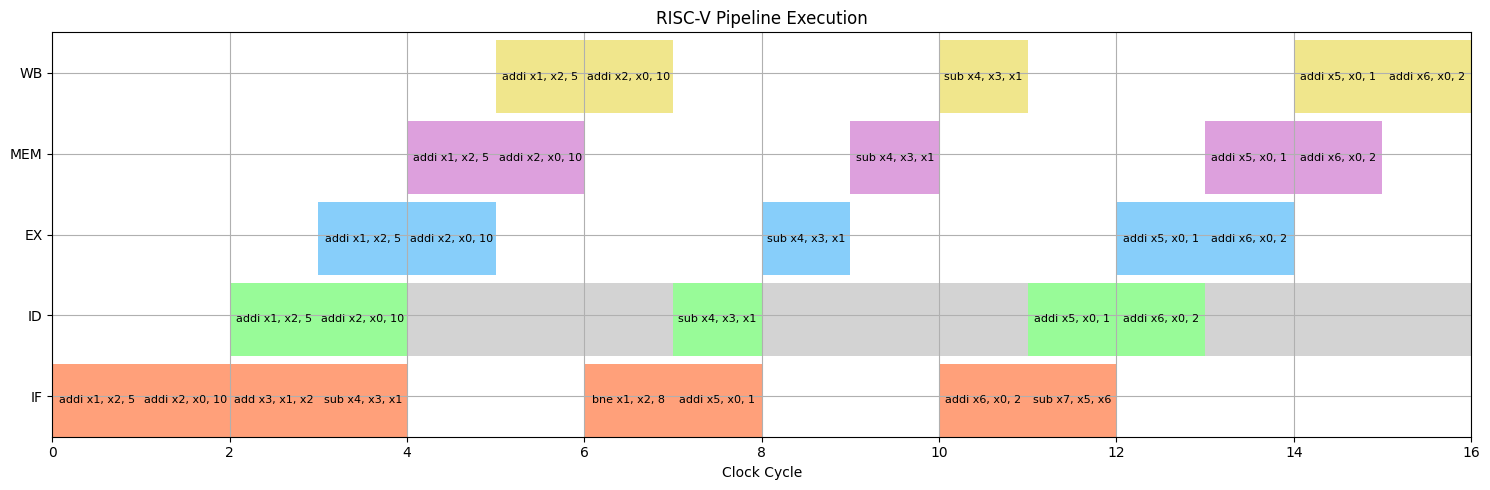

Cycle 1:
  IF: addi x1, x2, 5
  ID: -
  EX: -
  MEM: -
  WB: -

Cycle 2:
  IF: addi x2, x0, 10
  ID: -
  EX: -
  MEM: -
  WB: -

Cycle 3:
  IF: add x3, x1, x2
  ID: addi x1, x2, 5
  EX: -
  MEM: -
  WB: -

Cycle 4:
  IF: sub x4, x3, x1
  ID: addi x2, x0, 10
  EX: addi x1, x2, 5
  MEM: -
  WB: -

Cycle 5:
  IF: -
  ID: stall
  EX: addi x2, x0, 10
  MEM: addi x1, x2, 5
  WB: -

Cycle 6:
  IF: -
  ID: stall
  EX: -
  MEM: addi x2, x0, 10
  WB: addi x1, x2, 5

Cycle 7:
  IF: bne x1, x2, 8
  ID: stall
  EX: -
  MEM: -
  WB: addi x2, x0, 10

Cycle 8:
  IF: addi x5, x0, 1
  ID: sub x4, x3, x1
  EX: -
  MEM: -
  WB: -

Cycle 9:
  IF: -
  ID: stall
  EX: sub x4, x3, x1
  MEM: -
  WB: -

Cycle 10:
  IF: -
  ID: stall
  EX: -
  MEM: sub x4, x3, x1
  WB: -

Cycle 11:
  IF: addi x6, x0, 2
  ID: stall
  EX: -
  MEM: -
  WB: sub x4, x3, x1

Cycle 12:
  IF: sub x7, x5, x6
  ID: addi x5, x0, 1
  EX: -
  MEM: -
  WB: -

Cycle 13:
  IF: -
  ID: addi x6, x0, 2
  EX: addi x5, x0, 1
  MEM: -
  WB: -

Cycle 

'Print final memory state\nprint("\nFinal Memory State:")\nfor address, value in pipeline.memory.items():\n    print(f"  Address {address}: {value}")'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum, auto

class InstructionType(Enum):
    R_TYPE = auto()
    I_TYPE = auto()
    S_TYPE = auto()
    B_TYPE = auto()
    U_TYPE = auto()
    J_TYPE = auto()

class Instruction:
    def __init__(self, raw):
        self.raw = raw.strip()
        parts = self.raw.split()
        self.op = parts[0]
        self.args = parts[1:]
        self.rd = self.args[0].rstrip(',') if self.args else None
        self.rs1 = None
        self.rs2 = None
        self.imm = None
        self.parse_args()
        self.type = self.determine_type()

    def parse_args(self):
        if len(self.args) > 1:
            if self.args[1].startswith('x'):
                self.rs1 = self.args[1].rstrip(',')
            else:
                self.imm = self.args[1].rstrip(',')
        if len(self.args) > 2:
            if self.args[2].startswith('x'):
                self.rs2 = self.args[2].rstrip(',')
            else:
                self.imm = self.args[2].rstrip(',')

    def determine_type(self):
        r_type = ['add', 'sub', 'and', 'or', 'xor', 'sll', 'srl', 'sra']
        i_type = ['addi', 'andi', 'ori', 'xori', 'slli', 'srli', 'srai', 'lw', 'lb', 'lh']
        s_type = ['sw', 'sb', 'sh']
        b_type = ['beq', 'bne', 'blt', 'bge', 'bltu', 'bgeu']
        u_type = ['lui', 'auipc']
        j_type = ['jal', 'jalr']

        if self.op in r_type:
            return InstructionType.R_TYPE
        elif self.op in i_type:
            return InstructionType.I_TYPE
        elif self.op in s_type:
            return InstructionType.S_TYPE
        elif self.op in b_type:
            return InstructionType.B_TYPE
        elif self.op in u_type:
            return InstructionType.U_TYPE
        elif self.op in j_type:
            return InstructionType.J_TYPE
        else:
            raise ValueError(f"Unknown instruction type: {self.op}")

class Pipeline:
    def __init__(self):
        self.stages = {'IF': None, 'ID': None, 'EX': None, 'MEM': None, 'WB': None}
        self.stalls = 0
        self.cycle = 0
        self.history = []
        self.registers = {f'x{i}': 0 for i in range(32)}
        self.memory = {}
        self.branch_predictor = BranchPredictor()
        self.forwarding_unit = ForwardingUnit()

    def detect_hazard(self, instr):
        if not instr:
            return False

        data_hazard = self.forwarding_unit.detect_data_hazard(instr, self.stages)
        control_hazard = self.detect_control_hazard(instr)

        return data_hazard or control_hazard

    def detect_control_hazard(self, instr):
        return instr.type in [InstructionType.B_TYPE, InstructionType.J_TYPE]

    def cycle_pipeline(self, instructions):
        self.cycle += 1
        state = {stage: '-' for stage in self.stages}
        state['cycle'] = self.cycle

        # Write Back
        if self.stages['WB']:
            state['WB'] = self.stages['WB'].raw
            self.write_back(self.stages['WB'])

        # Memory
        self.stages['WB'] = self.stages['MEM']
        if self.stages['MEM']:
            state['MEM'] = self.stages['MEM'].raw
            self.memory_stage(self.stages['MEM'])

        # Execute
        self.stages['MEM'] = self.stages['EX']
        if self.stages['EX']:
            state['EX'] = self.stages['EX'].raw
            self.execute_stage(self.stages['EX'])

        # Instruction Decode
        if self.stalls > 0:
            state['ID'] = 'stall'
            self.stalls -= 1
        else:
            self.stages['EX'] = self.stages['ID']
            if self.stages['ID']:
                hazard = self.detect_hazard(self.stages['ID'])
                if hazard:
                    state['ID'] = 'stall'
                    self.stalls = 2
                    self.stages['EX'] = None
                else:
                    state['ID'] = self.stages['ID'].raw
                    self.decode_stage(self.stages['ID'])

        # Instruction Fetch
        if self.stalls == 0:
            self.stages['ID'] = self.stages['IF']
            if instructions:
                self.stages['IF'] = Instruction(instructions.pop(0))
                state['IF'] = self.stages['IF'].raw
                self.fetch_stage(self.stages['IF'])
            else:
                self.stages['IF'] = None

        self.history.append(state)
        return bool(instructions) or any(self.stages.values())

    def fetch_stage(self, instr):
        # Simulate instruction fetch
        pass

    def decode_stage(self, instr):
        # Simulate instruction decode
        if instr.type in [InstructionType.R_TYPE, InstructionType.I_TYPE]:
            if instr.rs1:
                instr.rs1_value = self.registers[instr.rs1]
            if instr.rs2:
                instr.rs2_value = self.registers[instr.rs2]
            if instr.imm:
                instr.imm_value = int(instr.imm)


    def execute_stage(self, instr):
        # Simulate instruction execution
        if instr.type == InstructionType.R_TYPE:
            if instr.op == 'add':
                instr.result = instr.rs1_value + instr.rs2_value
            elif instr.op == 'sub':
                instr.result = instr.rs1_value - instr.rs2_value
        elif instr.type == InstructionType.I_TYPE:
            if instr.op == 'addi':
                instr.result = instr.rs1_value + instr.imm_value

    def memory_stage(self, instr):
        # Simulate memory access
        if instr.type == InstructionType.S_TYPE:
            address = self.registers[instr.rs1] + int(instr.imm)
            value = self.registers[instr.rs2]
            self.memory[address] = value
        elif instr.type == InstructionType.I_TYPE and instr.op in ['lw', 'lb', 'lh']:
            address = self.registers[instr.rs1] + int(instr.imm)
            instr.result = self.memory.get(address, 0)

    def write_back(self, instr):
        # Simulate write back
        if instr.type in [InstructionType.R_TYPE, InstructionType.I_TYPE]:
            if hasattr(instr, 'result'):
                self.registers[instr.rd] = instr.result

    def run(self, instructions):
        instructions = instructions.copy()
        while self.cycle_pipeline(instructions):
            pass
        return self.history

class BranchPredictor:
    def __init__(self):
        self.prediction_table = {}

    def predict(self, branch_address):
        return self.prediction_table.get(branch_address, True)

    def update(self, branch_address, taken):
        self.prediction_table[branch_address] = taken

class ForwardingUnit:
    def detect_data_hazard(self, instr, stages):
        if not instr:
            return False
        for stage in ['EX', 'MEM']:
            if stages[stage] and (instr.rs1 == stages[stage].rd or instr.rs2 == stages[stage].rd):
                return True
        return False

    def forward(self, instr, stages):
        # Implement forwarding logic
        pass

def plot_pipeline(history):
    stages = ['IF', 'ID', 'EX', 'MEM', 'WB']
    colors = {'IF': '#FFA07A', 'ID': '#98FB98', 'EX': '#87CEFA', 'MEM': '#DDA0DD', 'WB': '#F0E68C', 'stall': '#D3D3D3'}

    fig, ax = plt.subplots(figsize=(15, 5))

    for i, cycle in enumerate(history):
        for j, stage in enumerate(stages):
            if cycle[stage] != '-':
                if cycle[stage] == 'stall':
                    ax.broken_barh([(i, 1)], (j*10, 9), facecolors=colors['stall'])
                else:
                    ax.broken_barh([(i, 1)], (j*10, 9), facecolors=colors[stage])
                    ax.text(i+0.5, j*10+4.5, cycle[stage], ha='center', va='center', fontsize=8)

    ax.set_ylim(0, 50)
    ax.set_xlim(0, len(history))
    ax.set_xlabel('Clock Cycle')
    ax.set_yticks([5+i*10 for i in range(5)])
    ax.set_yticklabels(stages)
    ax.set_title('RISC-V Pipeline Execution')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Input RISC-V assembly code
instructions = '''
addi x1, x2, 5
addi x2, x0, 10
add x3, x1, x2
sub x4, x3, x1
bne x1, x2, 8
addi x5, x0, 1
addi x6, x0, 2
sub x7, x5, x6
'''

# Run simulation
pipeline = Pipeline()
history = pipeline.run([instr for instr in instructions.strip().split('\n') if instr])

# Plot the pipeline diagram
plot_pipeline(history)

# Print cycle-by-cycle state
for state in history:
    print(f"Cycle {state['cycle']}:")
    for stage in ['IF', 'ID', 'EX', 'MEM', 'WB']:
        print(f"  {stage}: {state[stage]}")
    print()

# Print final register state
print("Final Register State:")
for reg, value in pipeline.registers.items():
    if value != 0:
        print(f"  {reg}: {value}")


'''Print final memory state
print("\nFinal Memory State:")
for address, value in pipeline.memory.items():
    print(f"  Address {address}: {value}")'''